1. EXPLORATIVE DATA ANALYSIS

IMPORTING LIBRARIES

In [1]:
import nltk
import spacy
from spacy import displacy
import pandas as pd
import matplotlib.pyplot as plt
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

DATA LOADING

In [2]:
# Caricamento dei dataset etichettati
df = pd.read_csv('./datasets/edos_labelled_aggregated.csv')

In [3]:
print(df.head())

                  rewire_id  \
0   sexism2022_english-9609   
1  sexism2022_english-16993   
2  sexism2022_english-13149   
3  sexism2022_english-13021   
4    sexism2022_english-966   

                                                text label_sexist  \
0  In Nigeria, if you rape a woman, the men rape ...   not sexist   
1                            Then, she's a keeper. 😉   not sexist   
2  This is like the Metallica video where the poo...   not sexist   
3                                             woman?   not sexist   
4                     I bet she wished she had a gun   not sexist   

  label_category label_vector  split  
0           none         none    dev  
1           none         none  train  
2           none         none  train  
3           none         none  train  
4           none         none    dev  


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   rewire_id       20000 non-null  object
 1   text            20000 non-null  object
 2   label_sexist    20000 non-null  object
 3   label_category  20000 non-null  object
 4   label_vector    20000 non-null  object
 5   split           20000 non-null  object
dtypes: object(6)
memory usage: 937.6+ KB


In [5]:
df.describe()

,rewire_id,text,label_sexist,label_category,label_vector,split
count,20000,20000,20000,20000,20000,20000
unique,20000,20000,2,5,12,3
top,sexism2022_english-9609,"In Nigeria, if you rape a woman, the men rape ...",not sexist,none,none,train
freq,1,1,15146,15146,15146,14000


DATA VISUALIZATION

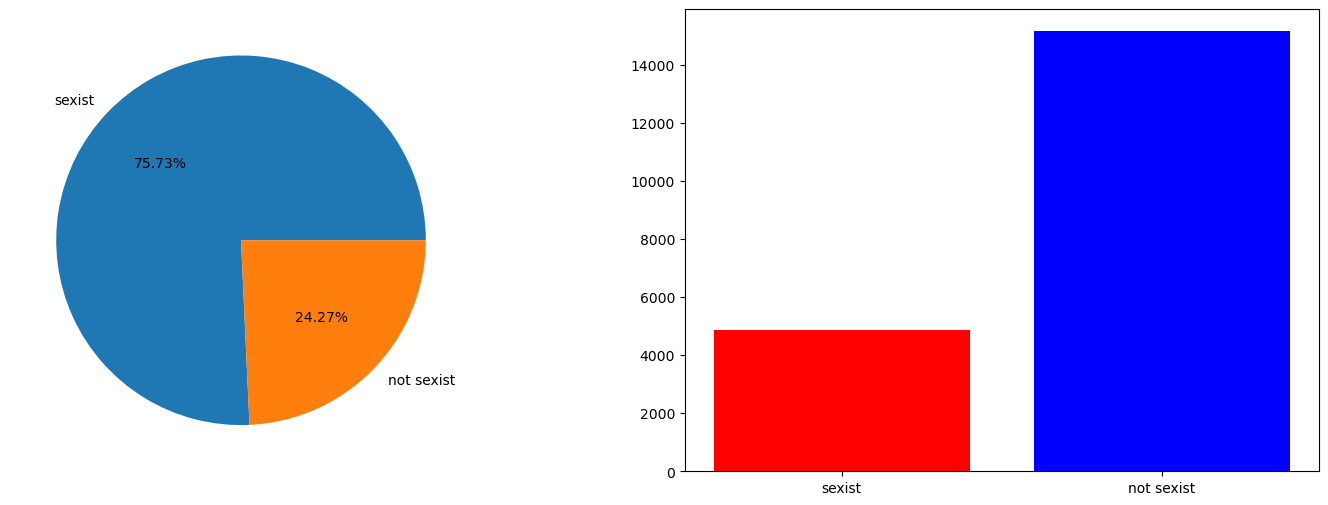

In [6]:
count = df['label_sexist'].value_counts()
labels = ["sexist", "not sexist"]
sizes = [count.get('sexist', 0), count.get('not sexist', 0)]
colors = ['red', 'blue']

fig, axs = plt.subplots(1, 2, figsize=(18, 6))

axs[0].pie(count,labels=labels, autopct='%1.2f%%')
axs[1].bar(labels, sizes, color=colors)
# plottare altri grafici

plt.show()

2. PRE-PROCESSING

In [7]:
# tokenizzazione, rimozione stopwords e stemming, applicare la pipeline

def tokenize(text):
    return nltk.word_tokenize(text)

def clean_tokens(tokens):
    stop_words = set(nltk.corpus.stopwords.words('english'))
    return [token.lower() for token in tokens if token.isalnum() and token.lower() not in stop_words]

def normalize(tokens):
    return [token.lower() for token in tokens]

def lemmatize(tokens):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in tokens]

def stem(tokens):
    stemmer = nltk.stem.PorterStemmer()
    return [stemmer.stem(token) for token in tokens]

def preprocess(text):
    tokens = tokenize(text)
    tokens = clean_tokens(tokens)
    tokens = normalize(tokens)
    tokens = lemmatize(tokens)
    tokens = stem(tokens)
    return ' '.join(tokens)


In [8]:
# Combine all text into a single variable
corpus = list(df['text'])

In [9]:
# print some information about the corpus
print("Original Corpus:", corpus)
print("Size of corpus:", len(corpus))
print("Size of the vocabulary:", len(set(corpus)))
print("lexical diversity:", len(set(corpus)) / len(corpus))

Original Corpus: ['In Nigeria, if you rape a woman, the men rape you back! #NSFW "In Nigeria, if you rape a woman, guys rape you back!" by [USER] [URL]', "Then, she's a keeper. 😉", 'This is like the Metallica video where the poor mutilated bastard was saying "Please kill me" over and over again, only with emojis instead of Morse code.', 'woman?', 'I bet she wished she had a gun', "Unlicensed day care worker reportedly tells cops she would 'rather be deported than go to jail' after allegedly breaking child's legs", '[USER] Leg day is easy. Hot girls who wear miniskirts get asked out.', "I don't know if you should avoid this one or encourage her? And, can a woman rape a man? Rape, is forced sex, is it not? [URL]", "I get a new pussy every other week or whenever i want really. Didnt have to learn how to either from YouTube videos. Also PUAs dont get laid. At best they get 5/10 asian ladies after spending years pretending to be something they aren't. Its pathetic", 'I agree with that but a

In [10]:
# Apply preprocessing to the entire corpus
corpus_preprocessed = [preprocess(text) for text in corpus]

In [11]:
print("Preprocessed Corpus:", corpus_preprocessed)
print("Size of corpus:", len(corpus_preprocessed))
print("Size of the vocabulary:", len(set(corpus_preprocessed)))
print("lexical diversity:", len(set(corpus_preprocessed)) / len(corpus_preprocessed))

Preprocessed Corpus: ['nigeria rape woman men rape back nsfw nigeria rape woman guy rape back user url', 'keeper', 'like metallica video poor mutil bastard say pleas kill emoji instead mors code', 'woman', 'bet wish gun', 'unlicens day care worker reportedli tell cop would deport go jail allegedli break child leg', 'user leg day easi hot girl wear miniskirt get ask', 'know avoid one encourag woman rape man rape forc sex url', 'get new pussi everi week whenev want realli didnt learn either youtub video also pua dont get laid best get asian ladi spend year pretend someth pathet', 'agre time know well enough say love woman minut begin hit wall hotter younger woman enter pictur time impuls control go want', 'releas shit', 'make game better cope like game tri make one educ thing tri creat underr cope', 'guarante chimp deni use expir coupon', 'black op 1 first dlc ascens', 'come way men attract she', 'democrat minnesota leftist muzzi shithol dumbest klobuchar one dumb bitch moron posit tax b

In [12]:
# Update the dataframe with preprocessed text
df['text'] = corpus_preprocessed

In [13]:
df.head(5)

,rewire_id,text,label_sexist,label_category,label_vector,split
0,sexism2022_english-9609,nigeria rape woman men rape back nsfw nigeria ...,not sexist,none,none,dev
1,sexism2022_english-16993,keeper,not sexist,none,none,train
2,sexism2022_english-13149,like metallica video poor mutil bastard say pl...,not sexist,none,none,train
3,sexism2022_english-13021,woman,not sexist,none,none,train
4,sexism2022_english-966,bet wish gun,not sexist,none,none,dev


3. FEATURE EXTRACTION

In [17]:
# TF-IDF, Word embeddings using spacy

# print the pos of the text
nlp = spacy.load('en_core_web_sm')

for text in corpus[:5]:
    doc = nlp(text)
    displacy.render(doc, style='ent', jupyter=True)

# modello tfidf




5. MODEL DEFINITION

In [15]:
# train the model and test the model

#suddivisione dati di test e training

#regressione logistica

6. EVALUATION AND METRICS

In [16]:
# evaluate the model using metrics

#matrice di confuione e metriche